# 5장 회귀 (regression)

_이 수업자료는 우리 교재 내용 뿐아니라 다른 머신러닝 책들을 참고해서 만든 것이다. 특히 다음 책의 코드를 많이 활용했다._

[\<핸즈온 머신러닝\>](https://tensorflow.blog/handson-ml2/)

## 5.1 회귀 소개

회귀에 대해서는 3학년 1학기 \<회귀분석\> 과목에서 충분히 공부하였을 테지만 그래도 교재 290-291쪽에서 독립, 종속 변수, 회귀계수, 회귀 유형 등에 대해 간단히 복습하고 시작하자. 특히 `지도학습`에 속하는 분류와 회귀의 차이점을 잘 이해하자. 또, `이름은 회귀지만 분류알고리즘에 속하는 '로지스틱회귀'도 기억해두자.`

**규제(regularization)**

1) 318쪽으로 가서 **'편향-분산 tradeoff'** 에 대해 먼저 공부하자([그림](https://m.blog.naver.com/ckdgus1433/221594203319)). 318쪽 과녁 그림 네개를 잘 보라. 편향(bias)은 목표에서 벗어난 정도를 말하고 분산(variance)은 값의 변화 정도를 의미한다. 우리는 분산도 적고 편향도 적은 예측을 하고 싶지만 회귀를 위한 머신러닝 모델의 편향을 낮추면 분산이 커지고 분산을 낮추면 편향이 커진다. 이런 관계를 **bias-variance tradeoff** 라고 한다. 

319쪽 그림을 보자. 아래쪽 세 그림 가운데 가장 왼쪽 그림은 곡선 패턴을 가진 훈련 데이터에 직선 모델을 적합시키고 있다. 이 경우 데이터가 패턴에서 조금씩 벗어나도 직선은 거의 안 변하는 대신(분산이 낮다) 직선과 실제 데이터 패턴이 거리가 멀기 때문에 편향이 높다. 즉 `과소적합`(underfitting)의 경우라고 할 수 있다. 반대로 훈련데이터를 지나치게 민감하게 따라가는 오른쪽 곡선으로 모형을 만들면 편향은 낮은 대신 분산이 높아진다. 즉 훈련데이터에 대한 `과대적합`(overfitting)이 생길 수 있다.

그러므로 편향-분산 tradeoff는 모형의 복잡성과 관계있다. 모형의 복잡도가 높아지면 분산이 커지고 편향이 작아지며, 반대로 복잡도가 낮아지면 분산이 줄어드는 대신 편향이 커진다.

2) 회귀 모형을 만들 때에는 실제 데이터 값과 모형 값 사이의 오차를 최소로 만든다. `오차를 줄이는 데에만 신경쓸 경우 자주 문제가 되는 것이 과대적합`, 즉 모델을 너무 복잡하게 만드는 위험이다. 그와 같은 위험을 피하기 위해 이용하는 방법으로 회귀계수의 크기를 제어하는 규제(regularization)라는 것이 있다. 일반선형회귀, 릿지(ridge), 라쏘(lasso), 엘라스틱넷(elasticnet) 등이 규제 여부, 규제 종류에 따른 회귀 모델의 종류들이다.  

**로지스틱 회귀(logstic regression)** 

종속변수가 범주형 변수일 때 분류를 위해 이용하는 회귀 모델.

## 5.2 단순선형회귀를 통한 회귀 이해

292-294쪽 설명을 잘 읽고 잔차, 회귀계수, RSS(잔차제곱합, residual sum of square, SSE), 비용(cost, 손실)에 대해 이해하자. 

In [3]:
import numpy as np
np.random.seed(52)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

### 1) 정규 방정식을 사용한 선형 회귀

* 데이터 준비

`np.random` 모듈의 `rand(), randn()`을 이용해서 100개의 데이터를 만들자.

In [21]:
X = 2 * np.random.rand(100)  # 0과 1사이 난수, np.random.rand( , 1) : 2차원
y = 4 + 3 * X + np.random.randn(100)  # 표준정규분포 난수

In [19]:
print(X.shape, X.ndim)

(100,) 1


In [20]:
y.shape

(100,)

X, y는 각각 길이가 100인 1차원 배열이다.

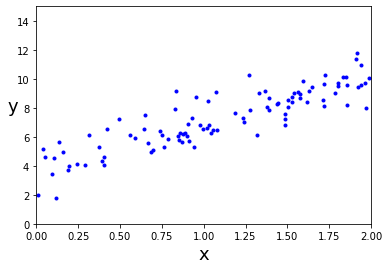

In [5]:
plt.plot(X, y, "b.")
plt.xlabel("x", fontsize=18)
plt.ylabel("y", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

* 단순선형회귀 모델 회귀계수 추정

**단순선형회귀모델**

data : $ (X_i , Y_i ) , ~~~ i = 1, \ldots, n$

$Y_i = w_0 + w_1 X_i + \epsilon_i , ~~~~ i = 1, \ldots, n $




**최소제곱법 정규 방정식** : 
$ (\mathbf{X}^T \mathbf{X}) {\boldsymbol{w}} = \mathbf{X}^T \mathbf{y}$

정규방정식의 해 : 
$\hat{\boldsymbol{w}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$

**퀴즈** : 위의 행렬 $\mathbf{X}$와 y, w의 shape은?\
X (100, 2) y (100, 1) w (2, 1)

이제 numpy 행렬 연산을 이용하여 정규방정식의 해를 구해보자.

아래 코드에서는 `np.c_(a, b)`는 배열 `a`와 `b`를 열 방향으로 차례대로 결합한다.

In [27]:
np.random.seed(52)
X_b = np.c_[np.ones((100)), X]  
print(X_b[:5])

[[1.         0.69427875]
 [1.         1.83633684]
 [1.         0.92024434]
 [1.         0.90647264]
 [1.         1.78956445]]


In [28]:
print(X_b.shape)

(100, 2)


행렬 `X_b` 는 두 1차원 배열을 세로로 결합한 2차원 배열($ 100 \times 2 $)이다.

행렬 `A`의 전치행렬은 `A.T`이며 `A`의 역행렬은 **np.linalg.inv(A)**으로 구할 수 있다. 또 두 행렬 `A, B`의 곱은 **A.dot(B)**로 구할 수 있다 (교재 37-8쪽 참조). 이러한 행렬 연산들을 이용하여 정규방정식의 해를 구할 수 있다.

In [29]:
w_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(w_best)

[4.09952619 3.04913504]


In [30]:
w_best

array([4.09952619, 3.04913504])

절편 $w_0$, 기울기 $w_1$의 추정값을 구했다. 이 직선으로 X 값이 0과 2일 때의 예측값을 계산해보자.

$\hat{y} = \mathbf{X} \boldsymbol{\hat{w}}$

In [10]:
X_new = np.array([0, 2])
X_new_b = np.c_[np.ones((2)), X_new]  
print(X_new) 
print()
print(X_new_b)

[0 2]

[[1. 0.]
 [1. 2.]]


In [11]:
y_predict = X_new_b.dot(w_best)
y_predict

array([ 3.79212432, 10.12023969])

100개 데이터와 최소제곱법으로 구한 회귀 직선을 그림으로 나타내보자.

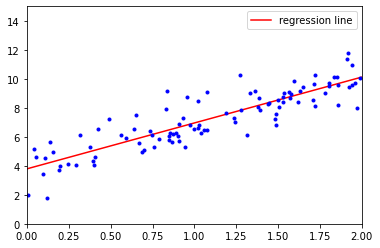

In [12]:
plt.plot(X_new, y_predict, "r-", label="regression line")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.legend()
plt.show()

100개 데이터의 예측값(`pred`)을 만든 뒤, 아래와 같이 그림을 그려도 마찬가지.

In [13]:
pred = X_b.dot(w_best)

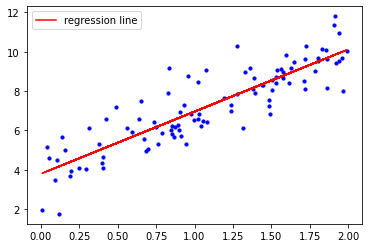

In [14]:
plt.scatter(X,y, c='b', s=10)
plt.plot(X, pred, c='r', label='regression line')
plt.legend()
plt.show()

- feature 변수들의 다중공선성

교재 304쪽 설명을 보자.

* 사이킷런을 이용한 회귀

이번에는 같은 100개 데이터의 회귀직선을 `sklearn.linear_model`에 있는 [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linearregression#sklearn.linear_model.LinearRegression)을 불러와서 구해보자. 절차는 분류 알고리즘들과 마찬가지로 객체를 만들고 `fit()`과 `predict()`로 모델과 예측값을 구한다. 따로 지정하지 않으면 절편항 계수도 자동으로 계산한다. 

다중회귀에서 만일 독립변수들이 갖는 값의 범위가 서로 많이 다르다면 `normalize = True` 옵션을 지정해서 각 변수 벡터의 길이를 1로 만들어주는 편이 좋다. normalization 대신 모든 독립변수를 표준화(평균 0, 분산 1)시키고 싶다면 회귀분석을 하기 전에 미리 `sklearn.preprocessing.StandardScaler`를 이용해서 데이터를 전처리해야한다 (실제 분석에서는 전체 데이터를 **train, test data로 분리하기 이전에 미리 전처리**해두는 편이 좋다).
먼저 위에서 만든 100개 데이터 X, y에 대해 단순회귀모형 회귀계수를 추정해보자. 

sklearn.linear_model에 있는`LinearRegression().fit(X, y)`은 feature 데이터 X자리에 2차원 배열을 필요로한다. 즉 X의 shape은 `(n_samples, n_features)`이어야 하고 y의 shape은 `(n_samples,)` 또는 `(n_samples, n_targets)`이어야한다. 

지금 우리가 연습하는 단순회귀에서는 독립변수의 수가 1개이므로 `X = 2 * np.random.rand(100)`와 같이 1차원 배열 X를 만든 다음 `X = X.reshape(-1,1)`라는 코드로 열이 하나인 2차원 배열로 바꾸면 되겠다. 아니면 처음에 X를 만들 때 `X = 2 * np.random.rand(100,1)`과 같이 2차원 배열로 만들어도 된다.

In [2]:
import numpy as np
np.random.seed(52)
X = 2 * np.random.rand(100)
y = 4 + 3 * X + np.random.randn(100)

In [5]:
from sklearn.linear_model import LinearRegression

X = X.reshape(-1, 1)
y = y.reshape(-1, 1)
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

데이터로 추정한 절편항 회귀계수 값은 **lin_reg.intercept_**에 있고, 기울기는 **lin_reg.coef_**에 있다. 아래 결과를 위에서 구한 `w_beta`와 비교해보라.

In [9]:
print(lin_reg.intercept_)
print(lin_reg.coef_)

[3.79212432]
[[3.16405769]]


새로운 데이터 `X_new`에서 `Y`값을 예측하려면,

In [7]:
X_new = np.array([0, 2]).reshape(-1,1)
lin_reg.predict(X_new)

array([[ 3.79212432],
       [10.12023969]])

단순선형회귀가 아닌 다중회귀 모형은 교재 302쪽을 보라. 독립변수의 수는 $m$개이며 절편항을 첫번째 열로 포함시킨다면 `X`행렬은 $n \times (m + 1)$ 행렬이다.

결정계수 ($R^2 $)

In [10]:
print(lin_reg.score(X,y))

0.7703706971161476


## 5.4 보스턴 주택가격 예측

p. 303 ~ 311

* 데이터

데이터 설명과 코드는 교재 306쪽에 있다.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

boston = load_boston()

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [21]:
type(boston)

sklearn.utils.Bunch

In [22]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [23]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [24]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

* CRIM: 지역별 범죄 발생률  
* ZN: 25,000평방피트를 초과하는 거주 지역의 비율
* NDUS: 비상업 지역 넓이 비율
* CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
* NOX: 일산화질소 농도
* RM: 거주할 수 있는 방 개수
* AGE: 1940년 이전에 건축된 소유 주택의 비율
* DIS: 5개 주요 고용센터까지의 가중 거리
* RAD: 고속도로 접근 용이도
* TAX: 10,000달러당 재산세율
* PTRATIO: 지역의 교사와 학생 수 비율
* B: 지역의 흑인 거주 비율
* LSTAT: 하위 계층의 비율
* MEDV: 본인 소유의 주택 가격(중앙값)

위의 변수 목록에서 맨 아래에있는 주택 가격이 target변수다.

boston 데이터의 data와 target을 data frame으로 만들어서 살펴보자.

In [25]:
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)
bostonDF['PRICE'] = boston.target

In [26]:
print(bostonDF.shape)

(506, 14)


독립변수들과 주택가격의 관계를 그림으로 그려보자.

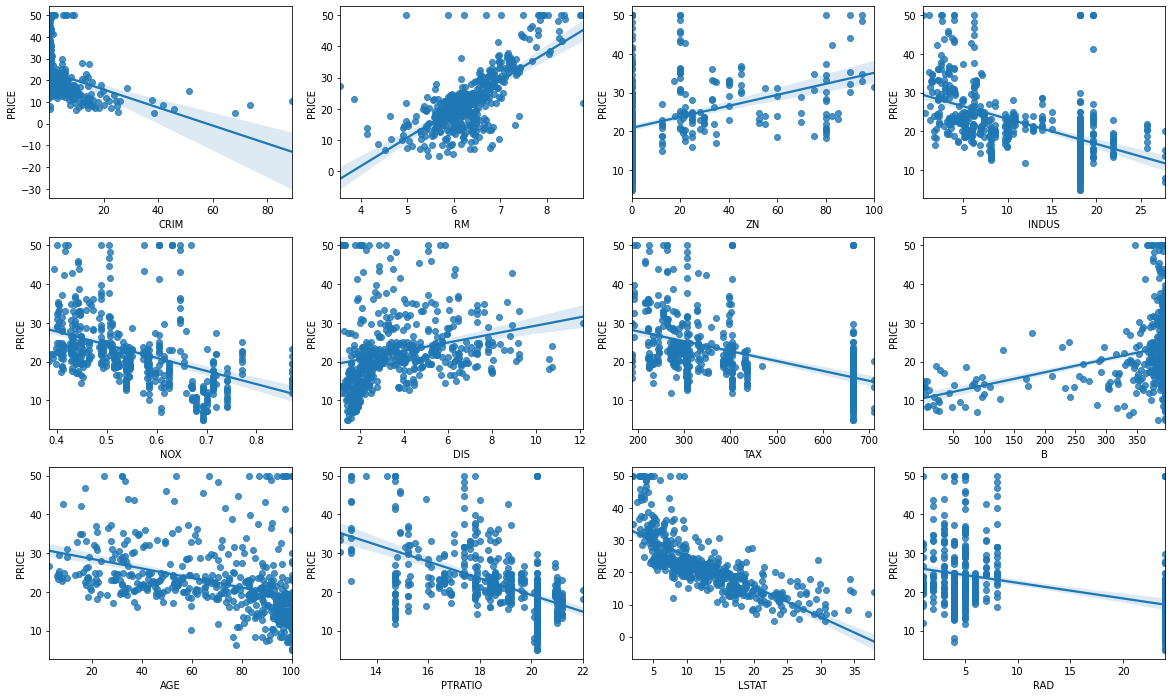

In [27]:
fig, axs = plt.subplots(figsize=(20,12) , ncols=4 , nrows=3)
lm_features = ['CRIM', 'RM','ZN','INDUS','NOX', 'DIS', 'TAX', 'B', 'AGE','PTRATIO','LSTAT','RAD']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    
    sns.regplot(x=feature , y='PRICE',data=bostonDF , ax=axs[row][col])

위의 그림을 보면 어떤 독립변수가 중요할 것 같은가? 방의수(RM), 하층민비율(LSTAT) 등이 중요해보인다. 과연 그림을 보고 예상한 변수의 중요도가 회귀모형 적합 결과에서도 나타나는지 알아보자.

* (데이터 전처리 없이) 학습과 테스트 데이터 세트로 데이터 분리, 학습/예측/평가

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)

X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)

In [29]:
X_train.shape

(354, 13)

In [30]:
X_test.shape

(152, 13)

`sklearn.metrics` 에 있는 `mean_squared_error , r2_score`에 대해 잠시 알아보자. [sklearn 설명서](https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error)

In [31]:
lr = LinearRegression()
lr.fit(X_train ,y_train )
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297 , RMSE : 4.159
Variance score : 0.757


In [32]:
print('절편 값:',lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

절편 값: 40.995595172164336
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


값의 크기 순으로 회귀 계수 정렬

In [33]:
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns )
coeff.sort_values(ascending=False)  #내림차순

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

$R^2 $

In [34]:
lr.score(X_train, y_train)

0.7273505005599823

회귀계수의 절대값 순으로 정렬

In [35]:
coeff_abs = np.abs(coeff)  # 절대값
coeff_abs.sort_values(ascending=False)

NOX        19.8
RM          3.4
CHAS        3.0
DIS         1.7
PTRATIO     0.9
LSTAT       0.6
RAD         0.4
ZN          0.1
CRIM        0.1
B           0.0
TAX         0.0
AGE         0.0
INDUS       0.0
dtype: float64

이번에는 독립변수들을 `normalization` 시켜서 모형을 만들어보자.

In [36]:
lr = LinearRegression(normalize=True)  #정규화 스케일링
lr.fit(X_train ,y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297 , RMSE : 4.159
Variance score : 0.757


In [37]:
print('절편 값:',lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

절편 값: 40.99559517216461
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


회귀 계수 추정 결과가 달라야하는데 사이킷런에서는 계산은 noramlize시킨 변수들로 한 다음 결과는 다시 원래 데이터에 대한 값을 보여준다.

이번에는 모형을 만들기 전에 독립변수들을 standardize 시켜보자. `표준화는 데이터를 train,test data로 나누기 전에 해두는 편이 안전하다.`

In [38]:
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)
bostonDF['PRICE'] = boston.target
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_data_scaled = scaler.fit_transform(X_data)

X_train_scaled , X_test_scaled , y_train , y_test = train_test_split(X_data_scaled , y_target ,test_size=0.3, random_state=156)

lr = LinearRegression()
lr.fit(X_train_scaled ,y_train)
y_preds = lr.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

print('절편 값:',lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

MSE : 17.297 , RMSE : 4.159
Variance score : 0.757
절편 값: 22.95123067721854
회귀 계수값: [-1.   1.5  0.2  0.8 -2.3  2.4  0.2 -3.7  3.1 -2.4 -2.   0.9 -4. ]


회귀 계수들은 어떻게 달라졌을까?

In [39]:
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns )
coeff.sort_values(ascending=False)

RAD        3.1
RM         2.4
ZN         1.5
B          0.9
CHAS       0.8
AGE        0.2
INDUS      0.2
CRIM      -1.0
PTRATIO   -2.0
NOX       -2.3
TAX       -2.4
DIS       -3.7
LSTAT     -4.0
dtype: float64

회귀계수의 절대값 순으로 정렬

In [40]:
coeff_abs = np.abs(coeff)
coeff_abs.sort_values(ascending=False)

LSTAT      4.0
DIS        3.7
RAD        3.1
TAX        2.4
RM         2.4
NOX        2.3
PTRATIO    2.0
ZN         1.5
CRIM       1.0
B          0.9
CHAS       0.8
AGE        0.2
INDUS      0.2
dtype: float64

standardization 여부에 따라 회귀계수 추정결과가 상당히 달라진다.

## 5.3 비용 최소화하기- 경사하강법(GD)

1) **경사하강법** (중요)

독립변수의 수가 많지 않을 때에는 정규방정식을 이용해서 회귀계수를 추정하는 데 별 문제가 없다. 하지만 `변수 수가 많아지면 역행렬 계산이 어려워지는 등의 문제가 생긴다.` 이럴 때 **경사하강법**(gradient descent, GD)으로 최적 회귀계수를 추정한다.

정규방정식을 이용한 추정방법은 한 번의 계산만 필요하지만 경사하강법은 반복적으로 최적의 답을 찾아나가는 방법이다. 우리가 찾는 최적값은 어떤 비용함수를 가장 작게 만드는 값이라고 하자. 경사하강법에서는 처음 w값에서 구한 비용함수의 미분값에 학습률(learning rate)를 곱한 값을 빼서 새로운 w값을 구한다.

[그림](https://velog.io/@sset2323/05-03.-%EB%B9%84%EC%9A%A9-%EC%B5%9C%EC%86%8C%ED%99%94%ED%95%98%EA%B8%B0-%EA%B2%BD%EC%82%AC-%ED%95%98%EA%B0%95%EB%B2%95Gradient-Descent-%EC%86%8C%EA%B0%9C)을 보자.

2) **단순회귀 모형의 경사하강법**

이어서 교재 296쪽의 그림과 그 아래 설명을 읽어보자. 우리는 비용함수를 최소화하는 회귀계수 w의 값을 찾으려고 한다. 가령 단순선형회귀 모형에서 오차제곱평균(MSE, 교재에서는 RSS라고 부르고 R(w)로 나타낸다)를 비용함수로 정했는데 그 비용함수의 모양이 교재 그림과 같다고 하자. 이 함수는 w의 함수이므로 가로축은 w를 나타내고 세로축은 MSE값을 나타낸다. 처음에 우리는 가로축에서 임의로 한 점을 w로 골라 그 값에서 비용함수의 편미분을 구한다. 

$ \frac {\partial}{\partial w_0 } R(w_0, w_1 ) $ 

$ \frac {\partial}{\partial w_1 } R(w_0, w_1 ) $

두 식의 모양은 교재 296에 나와있다. (위의 [그림](https://velog.io/@sset2323/05-03.-%EB%B9%84%EC%9A%A9-%EC%B5%9C%EC%86%8C%ED%99%94%ED%95%98%EA%B8%B0-%EA%B2%BD%EC%82%AC-%ED%95%98%EA%B0%95%EB%B2%95Gradient-Descent-%EC%86%8C%EA%B0%9C)에도 교재 내용이 나온다.)

절차를 정리하면 교재 297과 같다.

3) 학습률

경사하강법에서 가장 중요한 parameter는 학습률이다. 학습률이 너무 작은 값이면 반복계산을 거듭해야하므로 시간이 오래걸린다. 한편 학습률이 너무 크면 찾는 값을 건너뛰어버리는 경우가 생길 수 있다. [그림](https://m.blog.naver.com/PostView.naver?blogId=ollehw&logNo=221517423957&proxyReferer=https:%2F%2Fwww.google.com%2F)을 보라. 또한 최소화해야할 비용함수가 지역 최소값을 갖는다면 처음 시작점 선택에 따라 다른 결과를 얻을 수도 있다. [그림](https://librewiki.net/wiki/%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95)을 보라.

경사하강법은 변수들의 scale에 큰 영향을 받는다. 따라서 StandardScaler 등을 이용한 전처리 과정이 매우 중요하다.

3) **배치 경사 하강법을 사용한 선형 회귀**

경사하강법의 반복 계산 과정에서 `전체 훈련 데이터세트`를 가지고 계산하는 방법. `데이터 규모가 크면 계산 속도가 느려진다.`

**비용 함수의 그레이디언트 벡터**

$
\dfrac{\partial}{\partial \boldsymbol{w}} \text{MSE}(\boldsymbol{w})
 = \dfrac{2}{N} \mathbf{X}^T (\mathbf{X} \boldsymbol{w} - \mathbf{y})
$



**경사 하강법의 스텝**

$
\boldsymbol{w}^{(\text{next step})} = \boldsymbol{w} - \eta \dfrac{\partial}{\partial \boldsymbol{w}} \text{MSE}(\boldsymbol{w})
$


앞에서 만든 100개의 X, y 데이터에 대해 임의의 난수로 회귀계수 w의 초기값을 정한 다음 위의 경사하강법 반복 단계를 1,000회 반복해서 회귀계수를 추정해보자. 학습률은 0.1로 두자.


In [41]:
X_b

array([[1.        , 1.64622068],
       [1.        , 0.05223596],
       [1.        , 0.42154128],
       [1.        , 1.23684354],
       [1.        , 0.19656893],
       [1.        , 1.24026262],
       [1.        , 0.10778044],
       [1.        , 1.92130812],
       [1.        , 1.96085875],
       [1.        , 1.0422553 ],
       [1.        , 1.27310669],
       [1.        , 1.5295139 ],
       [1.        , 1.52991059],
       [1.        , 0.83537116],
       [1.        , 1.53761061],
       [1.        , 0.8464035 ],
       [1.        , 1.85220714],
       [1.        , 1.36385297],
       [1.        , 0.73691118],
       [1.        , 1.71781971],
       [1.        , 0.76099136],
       [1.        , 0.18990853],
       [1.        , 0.64978143],
       [1.        , 0.83022437],
       [1.        , 1.4845479 ],
       [1.        , 1.31581774],
       [1.        , 0.40263366],
       [1.        , 1.61697583],
       [1.        , 1.57280488],
       [1.        , 0.78987928],
       [1.

In [42]:
eta = 0.1  # 학습률
n_iterations = 1000
n = 100

w = np.random.randn(2,1)  
w

array([[ 0.63980761],
       [-0.23388038]])

In [43]:
for iteration in range(n_iterations):
    gradients = 2/n * X_b.T.dot(X_b.dot(w) - y)  # 편미분
    w = w - eta * gradients

In [44]:
w

array([[3.79212432],
       [3.16405769]])

위의 결과를 앞에서 정규방정식을 풀어서 구한 단순회귀모형 추정결과와 비교해보라. 경사하강법이 쓸 만하겠는가?

또한 x가 0일 때, 2일 때 y 값도 예측해보자.

In [45]:
X_new_b.dot(w)

array([[ 3.79212432],
       [10.12023969]])

이번에는 학습률을 0.02, 0.1, 0.5로 바꾸어서 경사하강법을 적용해보자.

In [46]:
w_path_bgd = []

def plot_gradient_descent(w, eta, w_path=None):
    n = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(w)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/n * X_b.T.dot(X_b.dot(w) - y)  # 편미분
        w = w - eta * gradients
        if w_path is not None:
            w_path.append(w)
    plt.xlabel("x_1", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

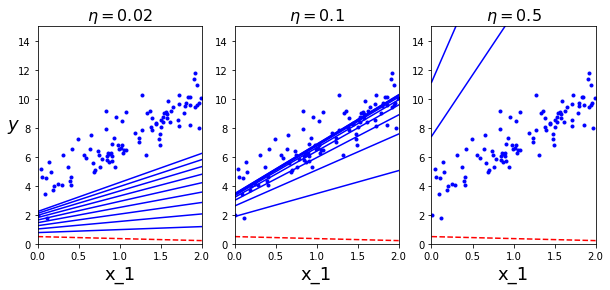

In [47]:
np.random.seed(42)
w = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(w, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(w, eta=0.1, w_path=w_path_bgd)
plt.subplot(133); plot_gradient_descent(w, eta=0.5)

plt.show()

각 그림에서 붉은 선은 맨처음 난수를 뽑아서 임의로 정한 w로 구한 회귀선, 즉 반복작업의 출발점이다. 세 그림을 비교해보자.

왼쪽 그림은 학습률이 너무 작아서 최적값을 찾는데 오래 걸릴 것이다. 반면 오른쪽 그림은 학습률이 너무 커서 최적값을 지나쳐 버린다. 가운데 그림이 가장 적절해 보인다.

최적 학습률을 구하기 위해 GridSearch 방법을 이용할 수 있다.

4) **확률적 경사 하강법(stochastic gradient descent)**

배치경사하강법과 달리 `일부 데이터(랜덤하게 선택한 하나의 데이터)만으로 w를 업데이트하므로 속도가 빠르다. 하지만 결과가 불안정해질 수 있다.` 즉 최적값을 못 찾을 수도 있다.


사이킷런에서는 `linear_model` 안에 있는 `SGDRegresor` 클래스를 이용하면 된다.
`LinearRegression()` 과 달리 `SGDRegresor`는 1차원 `y`를 요구하므로 아래와 같이 넘파이 함수 **revel()** 또는 **reshape(-1)** 등을 이용해서 2차원 배열 `y`를 1차원 배열로 바꿔야한다.

In [48]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [49]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.67284304]), array([3.10292283]))

## 5.5 다항 회귀와 과대적합, 과소적합

1. 다항회귀의 이해 (교재 311쪽)

polynomial (다항식) : 1차직선 뿐 아니라 아닌 2차, 3차 등 `고차항이 포함된 함수 식.`

사이킷런에서는 PolynomialFeatures 클래스를 이용하여 변수를 다항식 변수로 변환할 수 있다.

자칫하면 모형을 너무 복잡하게 만들 수 있는 방법이다.

* 독립변수가 하나인 경우의 다항회귀

In [9]:
import numpy as np

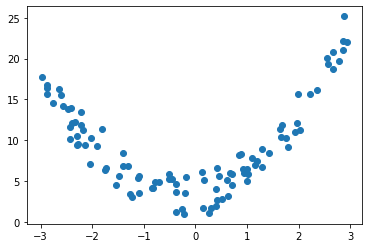

In [10]:
n = 100
np.random.seed(0)
X = 6 * np.random.rand(n, 1) -3
y = 2* X**2 + X + 3 + np.random.randn(n, 1)*1.5
plt.scatter(X, y)
plt.show()

그림으로 보면 X의 제곱항이 필요해보인다. 이럴 때 `sklearn.preprocessing`의 `PolynomialFeatures` 클래스를 이용하면 쉽게 고차항 feature 변수들을 만들 수 있다.

In [11]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias= False)  # degree=2 : 2차항
X_poly = poly.fit_transform(X)

In [12]:
X[0]  # x

array([0.29288102])

In [13]:
X_poly[0]  # x, x^2

array([0.29288102, 0.08577929])

즉, 원래 데이터가 $x$였다면 `X_poly`에는 $(x, x^2 )$이 들어있다. 이렇게 2차항까지 확장된 데이터 X_poly를 독립변수로 삼아 사이킷런 LinearRegression을 실행해보자.

In [14]:
lr2 = LinearRegression()
lr2.fit(X_poly, y)
lr2.intercept_, lr2.coef_

(array([3.51075113]), array([[0.96859828, 1.92468235]]))

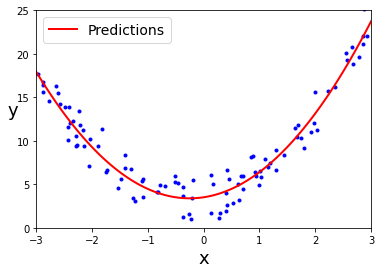

In [15]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly.transform(X_new)
y_new = lr2.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("x", fontsize=18)
plt.ylabel("y", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 25])

plt.show()

* 독립변수가 둘 이상인 경우의 다항 회귀

In [16]:
X = np.arange(4).reshape(2,2)
print(X )

[[0 1]
 [2 3]]


`PolynomialFeatures(degree=2)`라고 지정하면 두 변수 $(x_1 , x_2 )$를 $(1, x_1 , x_2 , x_1^2 , x_1 x_2 , x_2^2 )$로 변환한다. 만일 절편항에 해당하는 맨 앞의 1이 필요없다면 `include_bias= False`라고 지정한다.

In [17]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print(poly_ftr)

[[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


2. 고차 다항회귀와 과대적합

아래 코드를 상세히 보지 말고 결과 그림만 보자.

In [18]:
import numpy as np
n = 100
np.random.seed(0)
X = 6 * np.random.rand(n, 1) -3
y = 2* X**2 + X + 3 + np.random.randn(n, 1)*1.5

degree : 60, MSE : 1.159754561565509
degree : 15, MSE : 2.030027352724501
degree : 2, MSE : 2.190504762768198
degree : 1, MSE : 29.93210521461668


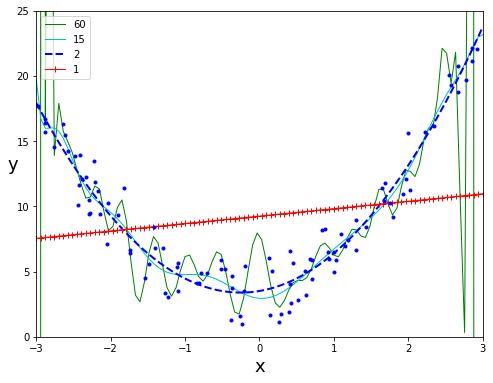

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
plt.figure(figsize = (8, 6))

for style, width, degree in (("g-", 1, 60), ("c-", 1, 15), ("b--", 2, 2), ("r-+", 1, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    pred =  polynomial_regression.predict(X)
    mse = mean_squared_error(y, pred)
    print("degree : {}, MSE : {}".format(degree, mse))
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.")
plt.legend(loc="upper left")
plt.xlabel("x", fontsize=18)
plt.ylabel("y", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 25])

plt.show()

그림을 보면 1차 직선은 데이터의 패턴을 거의 무시하는 과소적합 모델이다. 한편 60차 다항모델은 지나치게 데이터 변화에 민감한 과대적합 모델이다. 이처럼 다항회귀모델의 차수를 높이다보면 과대적합의 가능성이 생긴다. 차수가 높아질수록 MSE는 작아지지만 그 댓가는 복잡한 과대적합 모델이다.

아래 그림들을 통해 1차 직선 모델과 15차 다항 모델의 RMSE 값 변화를 보자.

In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)              

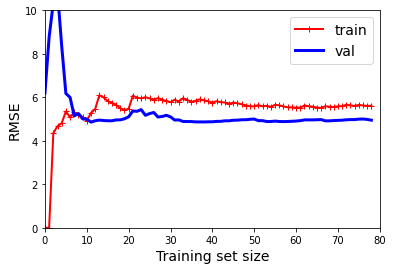

In [21]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 10])                         

plt.show()                                     

위의 그림에서 가로축은 독립변수 데이터의 수이고 세로축은 오차의 크기를 나타내는 MSE의 제곱근(RMSE)이다. 훈련데이터와 테스트데이터에서 모두 RMSE 값이 높으므로 이 모델은 과소적합 모델이라고 할 수 있다. 이제 다항회귀를 이용해서 오차를 줄여보자.

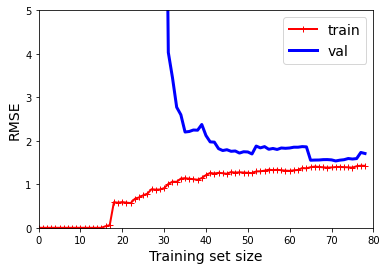

In [22]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=15, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 5])           # 책에는 없음

plt.show()                        # 책에는 없음

위의 그림은 15차 다항 모델에서 train set, test set에서의 RMSE를 그린 것이다. 1차 모형과 달리 두 선 사이에 간극이 있다. 즉 train data에서는 오차가 매우 낮지만 test data에서는 그렇지 않다. 즉 15차 회귀모델은 훈련데이터에 과대적합된 모델이라고 할 수 있다.

## 5.6. 규제가 있는 선형 모델 : Ridge, Lasso, ElasticNet

1. 규제 선형 모형(Regularized Linear Models)의 개요 (교재 319쪽)

오차제곱합(SSE)를 줄이는 데에 집중하다보면 모델이 복잡해져서 과대적합의 문제가 생긴다. 모델의 복잡도를 줄이는 방법으로는 독립변수의 수를 줄이는 방법도 있고 회귀계수(w)의 영향력을 줄이는 방법도 있다. 여기서는 회귀계수에 규제를 가하는 방법을 알아보자.

2. 릿지

**릿지 회귀의 비용 함수**

$
J(\boldsymbol{w}) = \text{MSE}(\boldsymbol{w}) + \alpha \dfrac{1}{2}\sum\limits_{i=1}^{n}{w_i}^2
$

위의 식에서 $\alpha$의 역할이 중요하다. 그 값이 0이면 비용함수를 작게만드는 것은 MSE만 작게 만드는 것과 같다. 즉 아무 규제없는 최소제곱법으로 모델을 추정하는 것과 같다. 하지만 $\alpha$ 값이 커지면 MSE 못지 않게 w값들의 크기도 중요해진다. 즉 비용함수를 작게 만들기 위해서는 오차 뿐 아니라 회귀계수 값들도 작게 만들어서 모델이 데이터에 덜 민감하도록, 즉 모델을 덜 복잡하게 만들어야한다. 

실제 데이터를 가지고 알아보자.

* boston 데이터 부르기(현재 사이킷런에서 윤리적인 문제로 삭제됨)

In [2]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np

boston = load_boston()
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)

bostonDF['PRICE'] = boston.target
print('Boston 데이타셋 크기 :',bostonDF.shape)

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)

ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


* alpha값을 0 , 0.1 , 1 , 10 , 100 으로 변경하면서 RMSE 측정

In [ ]:
alphas = [0 , 0.1 , 1 , 10 , 100]

for alpha in alphas :
    ridge = Ridge(alpha = alpha)
    
    #cross_val_score를 이용하여 5 fold의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f} '.format(alpha,avg_rmse))

* 각 alpha에 따른 회귀 계수 값을 시각화

In [ ]:
fig , axs = plt.subplots(figsize=(18,6) , nrows=1 , ncols=5)
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos , alpha in enumerate(alphas) :
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data , y_target)
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.  
    coeff = pd.Series(data=ridge.coef_ , index=X_data.columns )
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values , y=coeff.index, ax=axs[pos])

# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()

* alpha 값에 따른 컬럼별 회귀계수 출력

In [ ]:
ridge_alphas = [0 , 0.1 , 1 , 10 , 100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

3. 라쏘

**라쏘 회귀의 비용 함수**

$
J(\boldsymbol{w}) = \text{MSE}(\boldsymbol{w}) + \alpha \sum\limits_{i=1}^{n}\left| w_i \right|
$

In [ ]:
from sklearn.linear_model import Lasso, ElasticNet

# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환 
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, 
                        verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######')
    for param in params:
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, 
                                             y_target_n, scoring="neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        
        model.fit(X_data_n , y_target_n)
        if return_coeff:
            # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가. 
            coeff = pd.Series(data=model.coef_ , index=X_data_n.columns )
            colname='alpha:'+str(param)
            coeff_df[colname] = coeff
    
    return coeff_df
# end of get_linear_regre_eval

In [ ]:
# 라쏘에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df =get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)

In [ ]:
print(lasso_alphas)

In [ ]:
# 반환된 coeff_lasso_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

4. 엘라스틱넷 회귀

**엘라스틱넷 비용 함수**

$
J(\boldsymbol{w}) = \text{MSE}(\boldsymbol{w}) + r \alpha \sum\limits_{i=1}^{n}\left| w_i \right| + \dfrac{1 - r}{2} \alpha \sum\limits_{i=1}^{n}{{w_i}^2}
$

In [ ]:
# 엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
# l1_ratio는 0.7로 고정
elastic_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df =get_linear_reg_eval('ElasticNet', params=elastic_alphas,
                                      X_data_n=X_data, y_target_n=y_target)

In [ ]:
# 반환된 coeff_elastic_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)